# Crosswalk

brugr9 meets The Beatles at Abbey Road for Image Processing.

In [45]:
%matplotlib inline

In [46]:
import numpy as np
import matplotlib.pyplot as plot

## 1. Template Matching

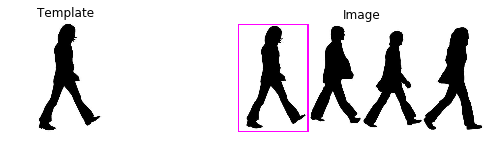

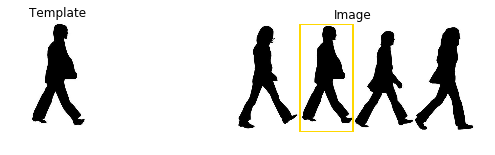

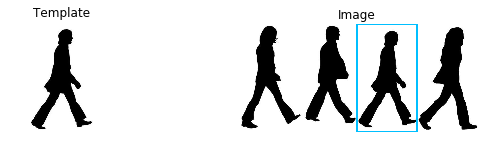

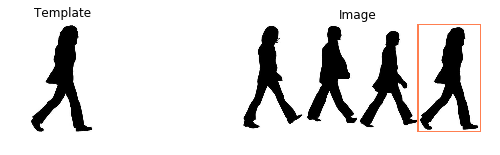

In [47]:
from skimage.io import imread
from skimage.feature import match_template

# imread: The different colour bands/channels are stored in the third dimension, 
# such that a grey-image is MxN, an RGB-image MxNx3 and an RGBA-image MxNx4.
image = imread('images/beatles-abbey-road-silhouette.jpg', True)

# George Harrison - Paul McCartney - Ringo Starr - John Lennon
george = imread('images/beatles-abbey-road-silhouette-1-george.jpg', True)
paul   = imread('images/beatles-abbey-road-silhouette-2-paul.jpg', True)
ringo  = imread('images/beatles-abbey-road-silhouette-3-ringo.jpg', True)
john   = imread('images/beatles-abbey-road-silhouette-4-john.jpg', True)

beatles = [[george, 'fuchsia'], [paul, 'gold'], [ringo, 'deepskyblue'], [john, 'coral']]

for member in beatles:
    template = member[0]

    result = match_template(image, template)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]

    fig = plot.figure(figsize=(15, 2))
    ax1 = plot.subplot(1, 3, 1)
    ax2 = plot.subplot(1, 3, 2)

    ax1.imshow(template, cmap=plot.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Template')

    ax2.imshow(image, cmap=plot.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('Image')
    # highlight matched region
    h, w = template.shape
    rect = plot.Rectangle((x, y), w, h, edgecolor=member[1], facecolor='none', lw=2)
    ax2.add_patch(rect)

    plot.show()